# 计算机视觉纳米学位项目

## 实战项目：图像标注

---

Microsoft **C**ommon **O**bjects in **CO**ntext (MS COCO)  数据集是用于场景理解的一个大型数据集。 该数据集通常用于训练并对目标检测进行基准测试、分割和标注生成算法。

![Sample Dog Output](https://raw.githubusercontent.com/rawk-v/MLND-projects/master/cv-project1-image-caption/images/coco-examples.jpg)

你可以在 [该网站](http://cocodataset.org/#home) 或在 [该研究论文](https://arxiv.org/pdf/1405.0312.pdf)中查阅有关该数据集的更多信息。

在这个 notebook 中，你将要对此数据集进行研究，从而为该实战项目做准备。

## Step 1: 初始化 COCO API

首先，我们要把将用于获取数据的 [COCO API](https://github.com/cocodataset/cocoapi) 初始化。

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!unzip -q workspace.zip

In [3]:
!mkdir -p /opt; cd /opt; git clone https://github.com/cocodataset/cocoapi

Cloning into 'cocoapi'...
remote: Enumerating objects: 953, done.
remote: Total 953 (delta 0), reused 0 (delta 0), pack-reused 953
Receiving objects: 100% (953/953), 11.70 MiB | 30.56 MiB/s, done.
Resolving deltas: 100% (566/566), done.


In [4]:
# train data
!mkdir -p /opt/cocoapi/images
!wget http://images.cocodataset.org/zips/train2014.zip
!unzip -q train2014.zip -d /opt/cocoapi/images/

!wget http://images.cocodataset.org/annotations/annotations_trainval2014.zip
!unzip -q annotations_trainval2014.zip -d /opt/cocoapi/

--2019-04-25 12:32:04--  http://images.cocodataset.org/zips/train2014.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.171.187
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.171.187|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13510573713 (13G) [application/zip]
Saving to: ‘train2014.zip’

train2014.zip       100%[===================>]  12.58G  62.3MB/s    in 3m 35s  

2019-04-25 12:35:40 (59.9 MB/s) - ‘train2014.zip’ saved [13510573713/13510573713]

--2019-04-25 12:38:55--  http://images.cocodataset.org/annotations/annotations_trainval2014.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.130.187
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.130.187|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252872794 (241M) [application/zip]
Saving to: ‘annotations_trainval2014.zip’

annotations_trainva 100%[===================>] 241.16M  99.1MB/s    in 2

In [5]:
    # val data
!mkdir -p /opt/cocoapi/images
!wget http://images.cocodataset.org/zips/val2014.zip
!unzip -q val2014.zip -d /opt/cocoapi/images/

--2019-04-25 12:40:04--  http://images.cocodataset.org/zips/val2014.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.232.99
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.232.99|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6645013297 (6.2G) [application/zip]
Saving to: ‘val2014.zip’

val2014.zip         100%[===================>]   6.19G  57.8MB/s    in 1m 57s  

2019-04-25 12:42:02 (54.1 MB/s) - ‘val2014.zip’ saved [6645013297/6645013297]



In [6]:
# test data
!mkdir -p /opt/cocoapi/images
!wget http://images.cocodataset.org/zips/test2014.zip
!unzip -q test2014.zip -d /opt/cocoapi/images

!wget http://images.cocodataset.org/annotations/image_info_test2014.zip
!unzip -q image_info_test2014.zip -d /opt/cocoapi/

--2019-04-25 12:43:38--  http://images.cocodataset.org/zips/test2014.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.134.11
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.134.11|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6660437059 (6.2G) [application/zip]
Saving to: ‘test2014.zip’

test2014.zip        100%[===================>]   6.20G  59.4MB/s    in 1m 53s  

2019-04-25 12:45:31 (56.0 MB/s) - ‘test2014.zip’ saved [6660437059/6660437059]

--2019-04-25 12:47:06--  http://images.cocodataset.org/annotations/image_info_test2014.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.145.243
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.145.243|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 763464 (746K) [application/zip]
Saving to: ‘image_info_test2014.zip’

image_info_test2014 100%[===================>] 745.57K  --.-KB/s    in 0.07s   

2019-04-25 

In [0]:
import os
import sys
sys.path.append('/opt/cocoapi/PythonAPI')
from pycocotools.coco import COCO

# initialize COCO API for instance annotations
dataDir = '/opt/cocoapi'
dataType = 'val2014'
instances_annFile = os.path.join(dataDir, 'annotations/instances_{}.json'.format(dataType))
coco = COCO(instances_annFile)

# initialize COCO API for caption annotations
captions_annFile = os.path.join(dataDir, 'annotations/captions_{}.json'.format(dataType))
coco_caps = COCO(captions_annFile)

# get image ids 
ids = list(coco.anns.keys())

loading annotations into memory...
Done (t=5.58s)
creating index...
index created!
loading annotations into memory...
Done (t=0.64s)
creating index...
index created!


## Step 2: 绘制样本图像

接下来，我们要从数据集中随机选择一张图像，并为其绘图，以及五个相应的标注。 每次运行下面的代码单元格时，都会选择不同的图像。

在这个项目中，你将使用这个数据集来训练你自己的模型，使其生成图像标注！

http://images.cocodataset.org/val2014/COCO_val2014_000000050125.jpg


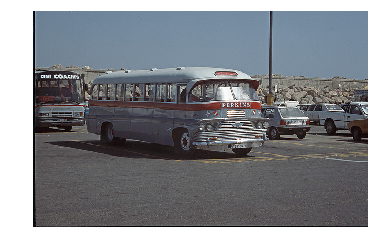

A silver and red bus in parking lot next to cars.
A silver bus that is parked in a lot.
An older picture of a bus and other vehicles in a parking lot. 
An old bus parks in a parking lot with other cars and bus.
An older silver metro bus in a parking lot.


In [0]:
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
%matplotlib inline

# pick a random image and obtain the corresponding URL
ann_id = np.random.choice(ids)
img_id = coco.anns[ann_id]['image_id']
img = coco.loadImgs(img_id)[0]
url = img['coco_url']

# print URL and visualize corresponding image
print(url)
I = io.imread(url)
plt.axis('off')
plt.imshow(I)
plt.show()

# load and display captions
annIds = coco_caps.getAnnIds(imgIds=img['id']);
anns = coco_caps.loadAnns(annIds)
coco_caps.showAnns(anns)

## Step 3: 接下来的任务！

在这个项目中，你要使用图像标注对数据集来训练CNN-RNN模型，从而使其自动由标注生成图像。 在接下来的一个 notebook  (**1_Preliminaries-zh.ipynb**) 中，你将了解更多关于如何设计这种架构的内容。

![Image Captioning CNN-RNN model](https://raw.githubusercontent.com/rawk-v/MLND-projects/master/cv-project1-image-caption/images/encoder-decoder.png)